<a href="https://colab.research.google.com/github/Mary7Magdalene/MLL/blob/main/DL_Project_1_breast_cancer_prediction_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependancies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
breast_cancer_dataset = datasets.load_breast_cancer()

In [23]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [24]:
breast_cancer_data =pd.DataFrame(breast_cancer_dataset.data,columns = breast_cancer_dataset.feature_names)

In [25]:
breast_cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
breast_cancer_data['label'] = breast_cancer_dataset.target

In [27]:
breast_cancer_data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [28]:
breast_cancer_data.shape

(569, 31)

In [29]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [30]:
breast_cancer_data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [31]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [32]:
breast_cancer_data['label'].value_counts()

,count
label,
1,357
0,212


1-->benign

0-->maligant

In [33]:
breast_cancer_data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [34]:
breast_cancer_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [35]:
x = breast_cancer_data.drop(columns ='label', axis =1)
y = breast_cancer_data['label']

In [36]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [37]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [38]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2, stratify = y, random_state = 2)

In [52]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


In [51]:
from sklearn.preprocessing import StandardScaler


AttributeError: 'StandardScaler' object has no attribute 'fit_transfrom'

building the neural network

In [53]:
scaler = StandardScaler()

In [55]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

In [58]:
print(x_train_std)

[[ 1.94029252  0.85536022  1.81300604 ...  1.30477202 -0.10637168
  -0.43949769]
 [-0.54671184 -1.21003611 -0.59777015 ... -1.44505823 -0.95211319
  -1.26923392]
 [-0.73503734 -0.20269437 -0.75741621 ... -0.73762301 -0.23746961
  -1.01847415]
 ...
 [-0.57994575 -0.09896353 -0.62149589 ... -0.9563972  -0.01364388
  -0.12911281]
 [ 0.54723774  0.31134958  0.64280442 ...  1.40126787  1.30692792
   1.73041024]
 [ 0.53062078  0.07392121  0.48195196 ...  0.56748339 -0.38135758
  -1.07419854]]


In [59]:
#importing the dependancies
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [46]:
#setting up the layers of the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (30,)),
                          keras.layers.Dense(20, activation ='relu'),
                          keras.layers.Dense(2, activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
#compiling the neural networks
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [62]:
#training th neural network
history = model.fit(x_train_std,y_train,validation_split= 0.2, epochs = 10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9472 - loss: 0.1461 - val_accuracy: 0.9670 - val_loss: 0.1145
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9596 - loss: 0.1232 - val_accuracy: 0.9670 - val_loss: 0.0994
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1095 - val_accuracy: 0.9670 - val_loss: 0.0890
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.1001 - val_accuracy: 0.9670 - val_loss: 0.0814
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9842 - loss: 0.0931 - val_accuracy: 0.9670 - val_loss: 0.0756
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9855 - loss: 0.0876 - val_accuracy: 0.9560 - val_loss: 0.0711
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9861 - loss: 0.0833 - val_accuracy: 0.9780 - val_loss: 0.0676
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9855 - loss: 0.0797 - val_accuracy: 0.9780 - val_loss

visualizing ccuracy and the loss

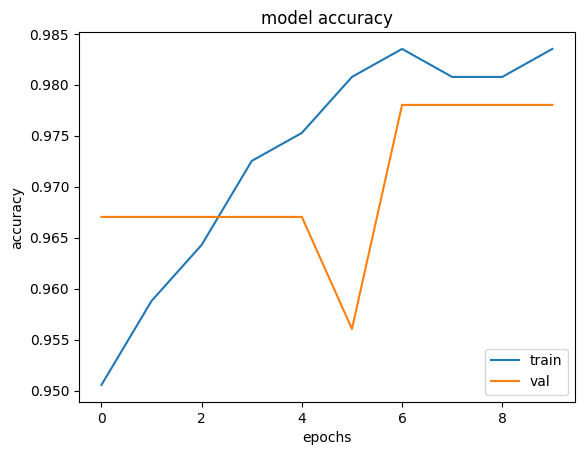

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'], loc = 'lower right')
plt.show()

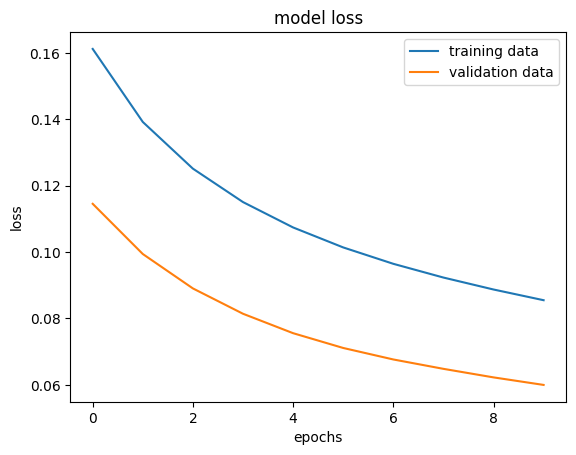

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data','validation data'], loc = 'upper right')
plt.show()

to get the accuracy of the model on test data

In [65]:
loss,accuracy =  model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9913 - loss: 0.0596 
0.9912280440330505


building a predictive system

In [66]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.55173443  0.27111721  0.51546193  0.41448256  0.34450241  0.24304749
  0.31656163  0.43409044  0.434987   -0.05796555 -0.13553341 -0.44636131
 -0.25658744 -0.12256972 -0.75051049 -0.16378397 -0.31334514 -0.51849783
 -0.35343666 -0.34790804  0.82872277  0.78764207  0.65251691  0.54586462
  0.90171862  0.99569682  0.50773246  0.51296263  1.78272707  1.06495251]


In [67]:
y_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [68]:
print(y_pred.shape)

(114, 2)


In [69]:
print(y_pred[0])

[0.9110751  0.02287407]


In [70]:
print(x_test_std)

[[ 0.55173443  0.27111721  0.51546193 ...  0.51296263  1.78272707
   1.06495251]
 [-0.42125284 -1.68710035 -0.48293836 ... -0.52915991 -0.29818772
   0.4148995 ]
 [-0.26174673 -0.41232011 -0.33354605 ... -1.04561844 -0.31185547
  -0.83766863]
 ...
 [ 0.28057404  0.82368355  0.4924785  ...  2.09376379 -0.14271708
   1.56796972]
 [ 1.84054379  1.45137953  1.79334075 ...  0.91451152  0.60730065
  -0.1373139 ]
 [-0.70517371 -0.42201425 -0.74081246 ... -1.15100519  0.42791144
  -1.18148919]]


In [71]:
print(y_pred)

[[9.11075115e-01 2.28740722e-02]
 [1.25832871e-01 9.90988851e-01]
 [1.14713781e-01 9.59051013e-01]
 [1.17482282e-01 9.39666450e-01]
 [1.68049455e-01 9.40188050e-01]
 [3.89023185e-01 7.17072845e-01]
 [1.33033976e-01 9.88440752e-01]
 [4.24862862e-01 9.69834864e-01]
 [3.54007751e-01 9.75224793e-01]
 [1.46518037e-01 9.86480594e-01]
 [9.55210567e-01 4.99305762e-02]
 [9.27857041e-01 3.56336683e-02]
 [2.18205214e-01 9.63309288e-01]
 [1.85975492e-01 6.77999198e-01]
 [9.94807601e-01 1.07540085e-03]
 [4.59125012e-01 7.53804564e-01]
 [1.97723508e-01 9.92790103e-01]
 [1.60081938e-01 9.85779345e-01]
 [1.45298749e-01 8.33097100e-01]
 [3.71610433e-01 6.16396666e-01]
 [5.33454001e-01 4.47465569e-01]
 [9.55059171e-01 1.94189418e-02]
 [9.85827625e-01 5.04671298e-02]
 [1.60279214e-01 7.87618816e-01]
 [4.31627452e-01 9.34559047e-01]
 [1.88036099e-01 9.54805434e-01]
 [8.52703571e-01 8.15821216e-02]
 [9.78880167e-01 9.16489772e-03]
 [2.33568043e-01 8.62334847e-01]
 [2.47195721e-01 9.78121758e-01]
 [1.713010

model.predict gives the prediction probability of each class for the datapoints

In [72]:
my_list = [10,28,78]
index_of_the_max_value  =np.argmax(my_list)
print(my_list)
print(index_of_the_max_value)


[10, 28, 78]
2


In [73]:
#converting the prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


Building the predictive system

In [74]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
#changing the input data into a numpy arra]
input_data_as_array = np.asarray(input_data)

#reshaping the array as we are predicting for only one data point
input_data_reshape = input_data_as_array.reshape(1,-1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshape)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label =[np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The breast_cancer is malignant')
else:
  print('The breast cancer is benign')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[9.9949628e-01 2.2381777e-05]]
[0]
The breast_cancer is malignant
